<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#282c5c;overflow:hidden;font-weight:500"><b>Coursera </b><br>EDA, Insights, Sentiment Analysis <br>Using Linear regression ML Model <br> </div>

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Introduction</div>

# ⌛️ 1. Introduction and problem

## 1.1. About Coursera
Coursera Inc. is a U.S.-based massive open online course provider founded in 2012 by Stanford University computer science professors Andrew Ng and Daphne Koller. Coursera works with universities and other organizations to offer online courses, certifications, and degrees in a variety of subjects.

- Stock price: COUR (NYSE) $15.51 +0.02 (+0.13%) - May 20, 10:12 AM EDT
- Founded: 2012
- Headquarters: California, United States
- Users: 92 million (2021)
- Employees: 1,138 (December 2021)
- Available in: Multilingual (40)
- Founders: Andrew Ng, Daphne Koller
* Our Reason &problem:
  Here i A scrapped data from Coursera official web site. my project aims to help any new learner get the right course to  learn by just answering a few questions. It is an intelligent course recommendation system. Hence, This is a scraped data  from few educational websites. This is data scrapped from Coursera website.


## 1.2. EDA
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Dataset Exploration</div>

# 🧾 2. Dataset Exploration

## Data Brief
Course dataset scrapped from Coursera website. This dataset contains mainly 6 columns and 890 course data. The detailed description:

1. course_title : Contains the course title.
2. course_organization : It tells which organization is conducting the courses.
3. courseCertificatetype : It has details about what are the different certifications available in courses.
4. course_rating : It has the ratings associated with each course.
5. course_difficulty : It tells about how difficult or what is the level of the course.
6. coursestudentsenrolled : It has the number of students that are enrolled in the course.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Data Loading and Basic Review</div>

# 📚 3. Data Loading and Basic Review

## 3.1. Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500"> Basic Exploration</div>

# 🧮 4.  Basic Exploration

In [2]:
coursera=pd.read_csv("/kaggle/input/coursera-course-dataset/coursea_data.csv")
coursera = pd.DataFrame(coursera)

In [3]:
coursera.head(15)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
5,661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
6,54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
7,488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
8,58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
9,129,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


In [4]:
coursera.describe(include=['object']).T

,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487
course_students_enrolled,891,205,120k,22


In [5]:
coursera.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


## 4.2 Initial plan for data exploration

Data Exploration
1. Ploting course_rating to get a overview of the distribution.
2. analyzing course Certificate types values.

Data Cleaning
1. Deleting first Unnamed column
2. Rename column course certficate type to course certficate

In [6]:
coursera=coursera.drop("Unnamed: 0",axis=1)

So, 1 numarical object only. But, we can turn some others to numarical too.

In [7]:
coursera.rename(columns = {'course_Certificate_type':'Certficate type'}, inplace = True)

coursera

,course_title,course_organization,Certficate type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Data Exploration</div>

# 📉 5. Data Exploration
 

# Creating a copy of the dataset

Extracting numerical values in column course student enrolled with removing k : using it futher 


In [8]:
coursera_new=coursera.copy()

In [9]:
def course_students_enrolled_modifier(x):
    return x[:-2]

In [10]:
coursera_new['course_students_enrolled_modified']=coursera_new['course_students_enrolled'].apply(course_students_enrolled_modifier)
coursera_new['course_students_enrolled_modified']=coursera_new['course_students_enrolled_modified'].apply(pd.to_numeric)
coursera_new =coursera_new.drop(['course_students_enrolled'],axis=1)
coursera_new

,course_title,course_organization,Certficate type,course_rating,course_difficulty,course_students_enrolled_modified
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,1.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,13.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,9.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,32.0
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,5.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,2.0
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,3.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.0


# **Convert course_difficulty_modifier to numeric**

In [11]:
def course_difficulty_modifier(x):
    if x=="Beginner":
        return "0"
    elif x=="Intermediate":
        return "1"
    elif x=="Mixed":
        return "0.5"
    elif x=="Advanced":
        return "2"
    else:
        return "0" 

In [12]:
coursera_new['course_difficulty_modified']=coursera_new['course_difficulty'].apply(course_difficulty_modifier)
coursera_new['course_difficulty_modified']=coursera_new['course_difficulty_modified'].apply(pd.to_numeric)
coursera_new =coursera_new.drop(['course_difficulty'],axis=1)
coursera_new

,course_title,course_organization,Certficate type,course_rating,course_students_enrolled_modified,course_difficulty_modified
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,5.0,0.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,1.0,1.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,13.0,0.5
3,A Law Student's Toolkit,Yale University,COURSE,4.7,9.0,0.5
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,32.0,0.5
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,5.0,1.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,2.0,0.5
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,3.0,1.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,9.0,1.0


# **Using Aggregate Function**

 calculating the sum, mean, median, min, and max of the course_rating column


In [13]:
rating_sum = coursera['course_rating'].sum()
rating_mean = coursera['course_rating'].mean()
rating_median = coursera['course_rating'].median()
rating_min = coursera['course_rating'].min()
rating_max = coursera['course_rating'].max()

Printing Result 

In [14]:
print(f'Sum: {rating_sum}, Mean: {rating_mean}, Median: {rating_median}, Min: {rating_min}, Max: {rating_max}')

Sum: 4167.5, Mean: 4.677328843995511, Median: 4.7, Min: 3.3, Max: 5.0


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Correlation Annalysis</div>

In [15]:
coursera_numaric=coursera_new.select_dtypes(include=np.number)

In [16]:
correlation = coursera_numaric.corr()
correlation

,course_rating,course_students_enrolled_modified,course_difficulty_modified
course_rating,1.000000,0.015848,-0.089810
course_students_enrolled_modified,0.015848,1.000000,-0.011345
course_difficulty_modified,-0.089810,-0.011345,1.000000


In [17]:
coursera_new_2 = coursera_new.groupby("course_organization")[["course_students_enrolled_modified", 'course_rating']].agg({"course_students_enrolled_modified":'size',"course_students_enrolled_modified":'mean','course_rating':'mean'}).reset_index()


In [18]:
coursera_new['overall_rating']=(coursera_new['course_students_enrolled_modified']/coursera_new['course_students_enrolled_modified'].max())*3+(coursera_new['course_rating']/coursera_new['course_rating'].max())*7
coursera_new=coursera_new.sort_values(by='overall_rating',ascending=False)

In [19]:
coursera_new.overall_rating.describe().T

count    881.000000
mean       6.856354
std        0.452615
min        5.126024
25%        6.616145
50%        6.792289
75%        6.986747
max        9.466988
Name: overall_rating, dtype: float64

coursera_best is a new data frame that contains the best rated courses(rating > 8.5)

In [20]:
coursera_best=coursera_new[coursera_new['overall_rating']>=8.5]
coursera_best

,course_title,course_organization,Certficate type,course_rating,course_students_enrolled_modified,course_difficulty_modified,overall_rating
261,English for Career Development,University of Pennsylvania,COURSE,4.8,76.0,0.5,9.466988
765,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,75.0,0.5,9.430843
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,83.0,0.0,9.300000
211,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,69.0,1.0,9.213976
626,Neural Networks and Deep Learning,deeplearning.ai,COURSE,4.9,63.0,1.0,9.137108
199,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,74.0,0.0,9.114699
129,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,79.0,0.0,9.015422
426,Improve Your English Communication Skills,Georgia Institute of Technology,SPECIALIZATION,4.7,61.0,0.0,8.784819
18,Academic English: Writing,"University of California, Irvine",SPECIALIZATION,4.7,54.0,0.0,8.531807


This will create a scatter plot showing the relationship between the course_rating and overall_rating features

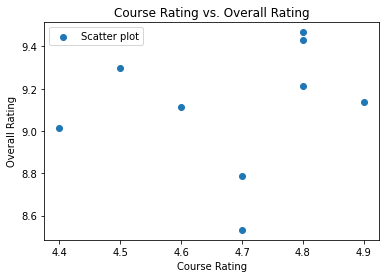

In [21]:
fig, ax = plt.subplots()

ax.scatter(coursera_best['course_rating'], coursera_best['overall_rating'])

ax.set_xlabel('Course Rating')
ax.set_ylabel('Overall Rating')
ax.set_title('Course Rating vs. Overall Rating')

ax.legend(['Scatter plot'])

plt.show()

**This is a heatmap showing the correlations between the different features in your data set. The color of each square in the heatmap represents the strength of the correlation, with warmer colors (red and yellow) indicating a strong correlation and cooler colors (green and blue) indicating a weak or no correlation.**

In [22]:
coursera_best_copy = coursera_best.copy()

<AxesSubplot:>

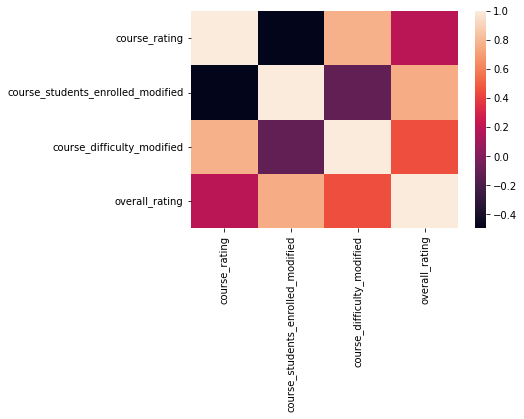

In [23]:
data = coursera_best_copy

# Calculating the correlations
corr = data.corr()
ax.legend(['heatmap'])
# Ploting the correlations using a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


Text(0.5, 1.0, '\nBest course providers\n\n')

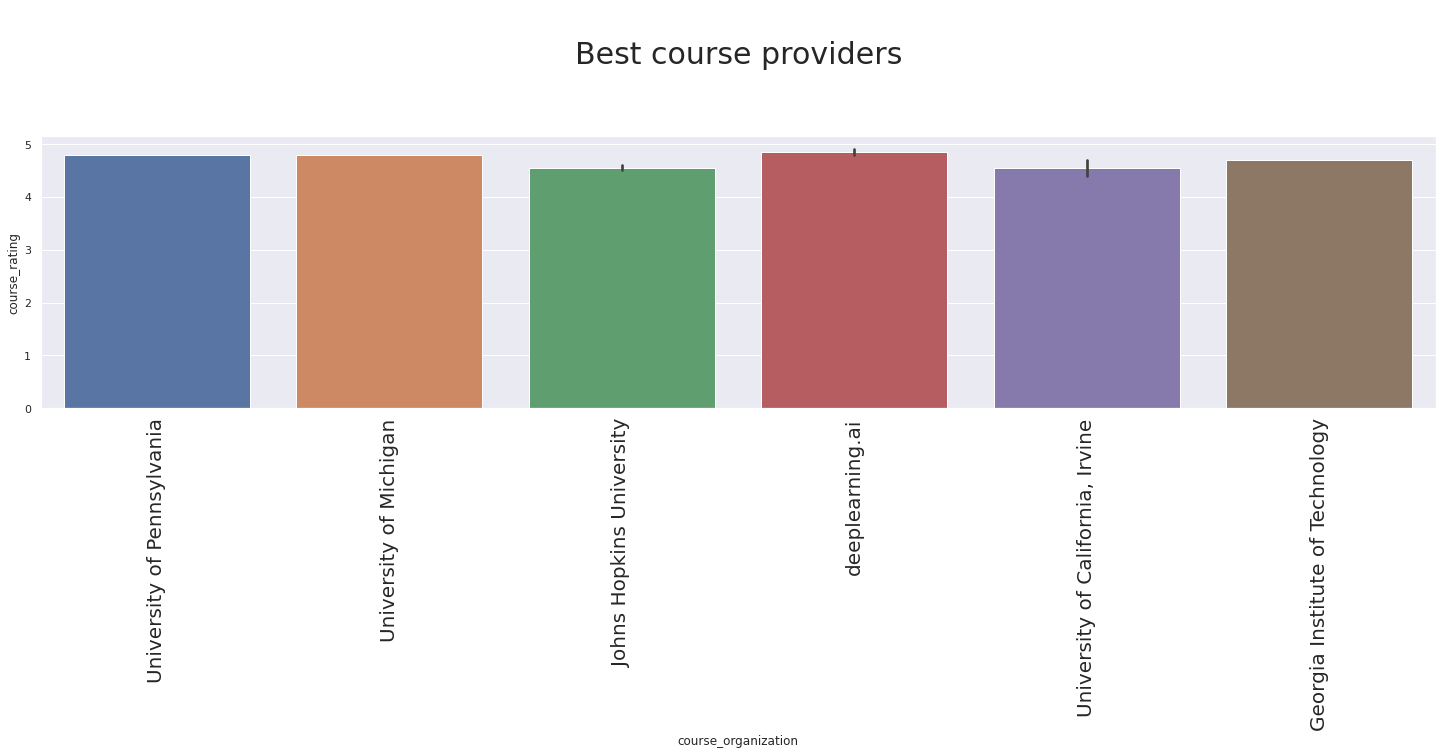

In [24]:
sns.set(rc={'figure.figsize':(25,5)})
plt.xticks(fontsize=20,rotation='vertical')
p=sns.barplot(x='course_organization',y="course_rating",data=coursera_best,hue_order=coursera_new['overall_rating'])
p.axes.set_title("\nBest course providers\n\n",fontsize=30)

The score method for a regression model returns the coefficient of determination (R^2), which is a measure of how well the model fits the data. A value of 1.0

The mean absolute error (MAE) is a measure of the difference between the predicted values and the true values. It is calculated as the average of the absolute errors between the predicted values and the true values. In this case, the MAE for the linear regression model is calculated using the test data, which is a sample of the data that was not used to train the model. The lower the MAE, the better the model's performance, as it indicates that the model is making predictions that are closer to the true values.

In [25]:
#spliting data into features and target
X = coursera_best_copy[['course_rating', 'course_students_enrolled_modified', 'course_difficulty_modified']]
y = coursera_best_copy['overall_rating']

# Spliting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
lr = LinearRegression()

# Training the model using the training data
lr.fit(X_train, y_train)

# Predicting the target variable for the test data
y_pred = lr.predict(X_test)

# Evaluating the model's performance
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.0


# Calculating the mean squared error, mean absolute error and the R-squared

In [26]:
mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-Squared:", r2)


Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-Squared: 1.0


**Ploting the data and the linear regression line
***note:** the linear regression model will attempt to find the line of best fit that describes the relationship between the independent variables (course rating, course students enrolled modified, and course difficulty modified) and the dependent variable (overall rating).**

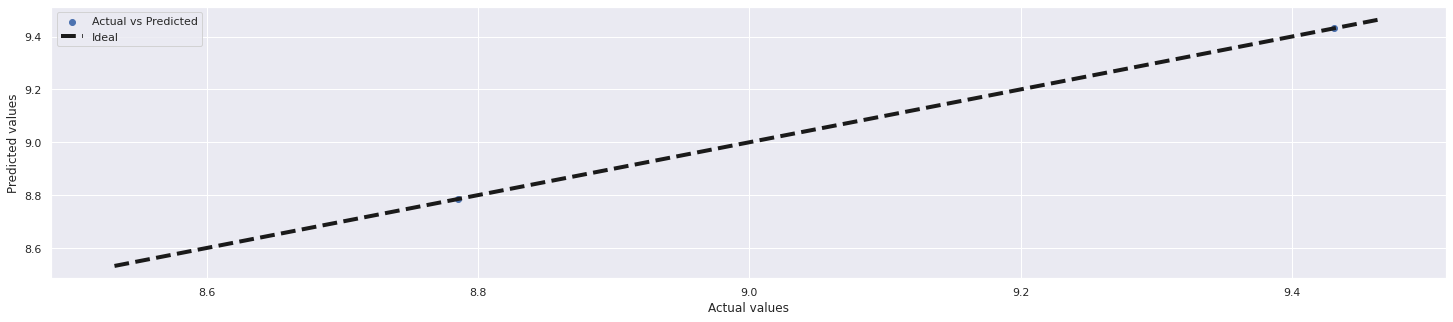

In [27]:
# Create the scatter plot
plt.scatter(y_test, y_pred, label="Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label="Ideal")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Add the legend
plt.legend()

plt.show()

# calculating the model accuaracy

In [28]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuaracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Key Findings and Insights</div>

# 📒 13. Key Findings and Insights

1. Average course rating is quite higher, compared to lowest and maximum value. So, the cours quality is being maintained.
2. Advanced courses' rating has some ups-and downs; maybe due to low frequency.
3. Beginner course has distribution quite similiar to total rating chart, as big portion of the data is from them, and he number of beginner level courses are high.
4. Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical.
5. Specializations has lower mean value than courses, but the distribution is interesting. specialization has good distribution values on right, but normal courses are on left.
6. No effective coorelation between course_difficulty,course_students_enrolled, course rating.
7. No effective coorelation between course_students_enrolled, course rating per university.
8. Mean number of students enrolled per university has some positive corelation to number of courses offered by the university. The more courses are offered, the more students are enroled in average.

<div style="padding:150px;color:white;margin:150;font-size:400%;text-align:center;display:fill;border-radius:5px;background-color:#282c5c;overflow:hidden;font-weight:800">Upvote, Comment, Share</div>